<>:6: SyntaxWarning: invalid escape sequence '\$'
<>:6: SyntaxWarning: invalid escape sequence '\$'
C:\Users\feelh\AppData\Local\Temp\ipykernel_26600\2753249200.py:6: SyntaxWarning: invalid escape sequence '\$'
  df['Sales'] = df['Sales'].replace('[\$,]', '', regex=True).astype(float)
C:\Users\feelh\AppData\Local\Temp\ipykernel_26600\2753249200.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales=df.groupby(pd.Grouper(key='Order Date',freq='M'))['Sales'].sum()
c:\Users\feelh\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


float64


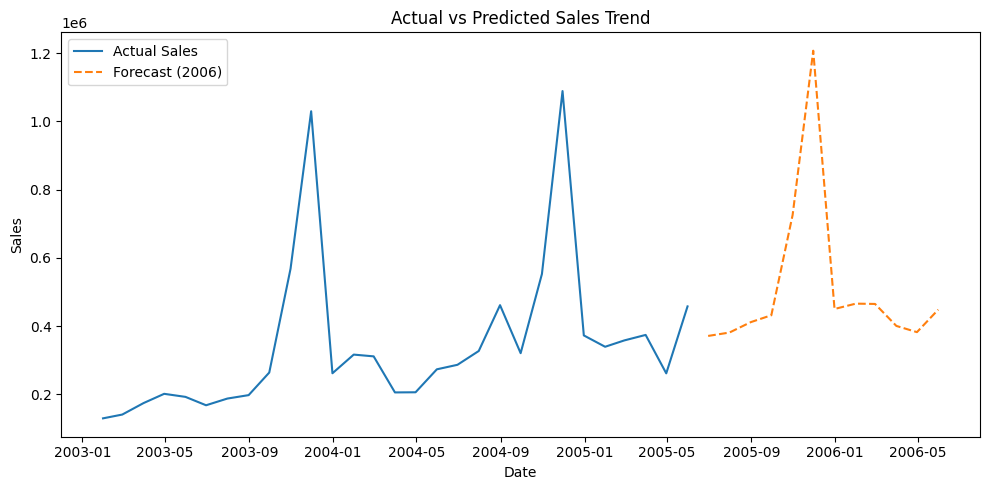

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
df=pd.read_csv('SalesTable.csv')
# Remove $ and commas, then convert to float
df['Sales'] = df['Sales'].replace('[\$,]', '', regex=True).astype(float)

df['Order Date']=pd.to_datetime(df['Order Date'])

monthly_sales=df.groupby(pd.Grouper(key='Order Date',freq='M'))['Sales'].sum()
train_data=monthly_sales

model = ExponentialSmoothing(
    train_data,
    trend='add',
    seasonal='add',
    seasonal_periods=12
).fit()
# for 2006 prediction
forecast = model.forecast(12)
plt.figure(figsize=(10,5))
plt.plot(train_data.index, train_data.values, label='Actual Sales')
plt.plot(forecast.index, forecast.values, label='Forecast (2006)', linestyle='--')
plt.title("Actual vs Predicted Sales Trend")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.tight_layout()
plt.show()


